# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

In [6]:
os.chdir('/content/drive/MyDrive/EDA_Assignment/NYC_Taxi_Assignment/trip_records')

In [7]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA_Assignment/NYC_Taxi_Assignment/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_temp = pd.read_parquet(file_name)
        df_temp['date'] = df_temp['tpep_pickup_datetime'].dt.date
        df_temp['hour'] = df_temp['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_temp['date'].unique():
            daily_date = df_temp[df_temp['date'] == date]
            # Iterate through each hour of the selected datec
            for hour in range(24):
                hourly_data = daily_date[daily_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = hourly_data.sample(frac = 0.075, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample])
                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844647 entries, 428 to 3193921
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_parquet('NYC_Taxi_Sampled_Data_2023')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file
df = pd.read_parquet('NYC_Taxi_Sampled_Data_2023')


In [16]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844647 entries, 428 to 3193921
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [18]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df = df.drop(columns=['date', 'hour'])


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0.0)


In [21]:
## Drop the duplicate Airport_fee column
df = df.drop(columns=['Airport_fee'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844647 entries, 0 to 2844646
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [23]:
# Sample contains 1 record of year 2022. Removing the record for year 2022
df =  df[~(df['tpep_pickup_datetime'].dt.year == 2022)]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

## There are no negative values in the 'fare_amount' column, so there is nothing to analyze in relation to 'RateCodeID' for negative fares.

In [25]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include=['number']).columns[(df.select_dtypes(include=['number']) < 0).any()]
negative_columns


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [27]:
df[negative_columns].lt(0).sum()

extra                      4
mta_tax                  129
improvement_surcharge    136
total_amount             136
congestion_surcharge      99
airport_fee                2
dtype: int64

In [28]:
# fix these negative values
df[negative_columns] = df[negative_columns].mask(df[negative_columns] < 0, other=0)


In [29]:
df[negative_columns].lt(0).sum()

extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [30]:
# Find the proportion of missing values in each column
missing_proportion = df.isna().mean().round(4) * 100
missing_proportion[missing_proportion > 0]


passenger_count         3.42
RatecodeID              3.42
store_and_fwd_flag      3.42
congestion_surcharge    3.42
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [34]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          97324
trip_distance                0
RatecodeID               97324
store_and_fwd_flag       97324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     97324
airport_fee                  0
dtype: int64

In [33]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].isna().sum()


97324

In [36]:
## Lets impute the missing values of passenger_count values using the mode since it's a categorical/numeric count variable. This approach ensures the minimal distortion while keeping the data realistic.
passenger_count_mode = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(passenger_count_mode, inplace=True)
df['passenger_count'].isna().sum()

0

In [37]:
df[df['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29              0.0   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32              0.0   
...           ...                  ...                   ...              ...   
2844170         1  2023-12-31 22:38:04   2023-12-31 22:40:34              0.0   
2844422         1  2023-12-31 23:13:06   2023-12-31 23:17:16              0.0   
2844458         1  2023-12-31 23:44:04   2023-12-31 23:53:59              0.0   
2844520         1  2023-12-31 23:06:18   2023-12-31 23:25:09              0.0   
2844607         1  2023-12-31 23:01:28   2023-12-31 23:14:29              0.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
118                0.0         5.0                  N           232   
192                3.0         1.0                  N           237   
197                2.4         1.0                  N            43   
234                1.0         1.0                  N           162   
235                0.7         1.0                  N           186   
...                ...         ...                ...           ...   
2844170            0.8         1.0                  N           107   
2844422            0.7         1.0                  N            24   
2844458            1.5         1.0                  N           229   
2844520            2.0         1.0                  N           246   
2844607            0.7         1.0                  N           170   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
118               232             1         14.0    0.0      0.0         0.0   
192                90             1         22.6    3.5      0.5         6.9   
197               166             1         12.8    3.5      0.5         2.2   
234               161             1         10.0    3.5      0.5         1.5   
235               234             1          6.5    3.5      0.5         2.3   
...               ...           ...          ...    ...      ...         ...   
2844170           137             1          5.8    3.5      0.5         0.0   
2844422           151             1          8.6    1.0      0.5         2.2   
2844458           164             4         11.4    3.5      0.5         0.0   
2844520           143             2         18.4    3.5      0.5         0.0   
2844607           161             1         10.0    3.5      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
118               0.0                    1.0          15.0   
192               0.0                    1.0          34.5   
197               0.0                    1.0          20.0   
234               0.0                    1.0          16.5   
235               0.0                    1.0          13.8   
...               ...                    ...           ...   
2844170           0.0                    1.0          10.8   
2844422           0.0                    1.0          13.3   
2844458           0.0                    1.0          16.4   
2844520           0.0                    1.0          23.4   
2844607           0.0                    1.0          15.0   

         congestion_surcharge  airport_fee  
118                       0.0          0.0  
192                       2.5          0.0  
197                       2.5          0.0  
234                       2.5          0.0  
235                       2.5          0.0  
...                       ...          ...  
2844170                   2.5          0.0  
2844422                   0.0          0.0  
2844458                   2.5          0.0  
2844520                   2

Did you find zeroes in passenger_count? Handle these.

In [38]:
passenger_count_mode = df['passenger_count'].mode()[0]
df.loc[df['passenger_count'] == 0, 'passenger_count'] = passenger_count_mode

# verify the update
df['passenger_count'].value_counts()

passenger_count
1.0    2208150
2.0     415576
3.0     103448
4.0      57899
5.0      35906
6.0      23633
8.0         18
7.0          9
9.0          7
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [40]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isna().sum()

# Fix missing values in 'RatecodeID'
ratecodeid_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecodeid_mode, inplace=True)

## Verify that there is no missing values in RateCodeID
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [42]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isna().sum()

congession_surcharge_median = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(congession_surcharge_median, inplace=True)
df['congestion_surcharge'].isna().sum()


0

In [43]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       97324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee                  0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [44]:
# Handle any remaining missing values
df['store_and_fwd_flag'].describe()



count     2747322
unique          2
top             N
freq      2730557
Name: store_and_fwd_flag, dtype: object

In [45]:
store_and_fwd_flag_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace=True)
df['store_and_fwd_flag'].isna().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [47]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
nyc_data_description = df.describe()
nyc_data_description


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.844646e+06                     2844646                     2844646   
mean   1.733152e+00  2023-07-02 19:59:32.482070  2023-07-02 20:16:58.790604   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:03:28   
25%    1.000000e+00  2023-04-02 16:10:45.250000  2023-04-02 16:29:46.250000   
50%    2.000000e+00         2023-06-27 15:43:28         2023-06-27 16:03:00   
75%    2.000000e+00  2023-10-06 19:39:20.250000  2023-10-06 19:55:05.750000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.475273e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.844646e+06   2.844646e+06  2.844646e+06  2.844646e+06   
mean      1.371995e+00   3.913551e+00  1.614355e+00  1.652826e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.919450e+05  9.900000e+01  2.650000e+02   
std       8.640560e-01   1.937501e+02  7.274560e+00  6.399916e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.844646e+06  2.844646e+06  2.844646e+06  2.844646e+06  2.844646e+06   
mean   1.640477e+02  1.163844e+00  1.990546e+01  1.587652e+00  4.952757e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.978703e+01  5.084577e-01  8.681637e+01  1.829248e+00  4.864555e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.844646e+06  2.844646e+06           2.844646e+06  2.844646e+06   
mean   3.549690e+00  5.982361e-01           9.990165e-01  2.897283e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    4.805000e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.068774e+00  2.191304e+00           2.903006e-02  8.788902e+01   

       congestion_surcharge   airport_fee  
count          2.844646e+06  2.844646e+06  
mean           2.314279e+00  8.550273e-03  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.750000e+00  1.250000e+00  
std            6.555984e-01  1.030278e-01

In [48]:
## Filter the all numeric colulmns
nyc_numeric_columns = df.select_dtypes(include=['number']).columns
nyc_numeric_columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [49]:
## Identify the potential outliers using the IQR method
Q1 = df[nyc_numeric_columns].quantile(0.25)
Q3 = df[nyc_numeric_columns].quantile(0.75)
iqr = Q3 - Q1

## Define outlier outbound
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

## Count outliers per column
nyc_outliers_count = ((df[nyc_numeric_columns] < lower_bound) | (df[nyc_numeric_columns] > upper_bound)).sum()
nyc_data_description, nyc_outliers_count

(           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
 count  2.844646e+06                     2844646                     2844646   
 mean   1.733152e+00  2023-07-02 19:59:32.482070  2023-07-02 20:16:58.790604   
 min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:03:28   
 25%    1.000000e+00  2023-04-02 16:10:45.250000  2023-04-02 16:29:46.250000   
 50%    2.000000e+00         2023-06-27 15:43:28         2023-06-27 16:03:00   
 75%    2.000000e+00  2023-10-06 19:39:20.250000  2023-10-06 19:55:05.750000   
 max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
 std    4.475273e-01                         NaN                         NaN   
 
        passenger_count  trip_distance    RatecodeID  PULocationID  \
 count     2.844646e+06   2.844646e+06  2.844646e+06  2.844646e+06   
 mean      1.371995e+00   3.913551e+00  1.614355e+00  1.652826e+02   
 min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [50]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

## Verify all values greater than 6 are removed
df['passenger_count'].max()


6.0

In [ ]:
# Continue with outlier handling



In [51]:
# Check entries where 'trip_distance' is zero and 'fare_amount' is greater than $300.
df[(df['trip_distance'] == 0) & (df['fare_amount'] > 300)]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
49169           2  2023-01-08 11:41:36   2023-01-08 11:41:43              1.0   
57033           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
69589           1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
92605           2  2023-01-14 03:29:33   2023-01-14 03:30:26              4.0   
118675          2  2023-01-17 18:03:22   2023-01-17 18:03:27              1.0   
135358          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
259533          2  2023-03-08 17:25:53   2023-03-08 17:26:00              1.0   
477032          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
541627          1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
559393          2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
560773          1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
614914          2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
642927          2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
649673          2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
671377          2  2023-06-23 19:58:13   2023-06-23 19:58:26              4.0   
679524          1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
695635          2  2023-06-26 22:47:43   2023-06-26 22:47:54              1.0   
718117          2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
728628          1  2023-08-01 11:12:09   2023-08-01 11:12:09              1.0   
733589          2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
815500          2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
863744          2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
863753          2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
894319          2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
898188          2  2023-08-26 05:35:35   2023-08-26 05:35:48              1.0   
908392          2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
998111          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
1198492         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
1264121         1  2023-04-13 11:07:00   2023-04-13 11:07:00              1.0   
1325352         2  2023-04-20 15:56:24   2023-04-20 15:56:36              1.0   
1336344         2  2023-04-26 18:48:47   2023-04-26 18:49:13              1.0   
1494884         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1563624         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
1587780         2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
1598363         2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
1620307         2  2023-05-26 15:56:00   2023-05-26 15:56:16              3.0   
1753461         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
1764569         2  2023-07-17 10:12:24   2023-07-17 10:20:32              1.0   
1844361         2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
1886179         2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   
1980392         2  2023-09-14 16:20:32   2023-09-14 16:21:35              1.0   
2001859         2  2023-09-17 00:40:08   2023-09-17 00:40:16              1.0   
2144242         2  2023-10-08 00:49:26   2023-10-08 00:49:40              1.0   
2156889         2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
2180343         1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
2212940         2  2023-10-16 14:11:05   2023-10-16 14:11:15              1.0   
2244568         2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
2566609         2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
2576366         2  2023-11-27 23:10:48  

In [52]:
# Let's remove entries where 'trip_distance' is zero and 'fare_amount' is greater than $300.
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]

In [53]:
# Check entries where 'trip_distance' and 'fare_amount' are zero but pickup and drop off zones are different.
# These are outliers and lers remove it.
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [54]:
# Check entries where 'trip_distance' is greater than 250 miles and these are outiers. It can impact the data so lets remove it.
df = df[~(df['trip_distance'] > 250)]

In [55]:
# Checking the payment type values
df['payment_type'].value_counts()

payment_type
1    2238697
2     474204
0      97280
4      20624
3      13587
Name: count, dtype: int64

In [56]:
# As there is no payment type 0 is defined, it's invalid record. So let's Replace payment_type 0 with 5 (unknown value).
df['payment_type'].replace(0, 5, inplace=True)

In [58]:
# verifying the update by checking the count
df['payment_type'].value_counts()

payment_type
1    2238697
2     474204
5      97280
4      20624
3      13587
Name: count, dtype: int64

In [59]:
# Replacing trip_distance zero values with the median
trip_distnace_median = df['trip_distance'].median()
df['trip_distance'].replace(0, trip_distnace_median, inplace=True)

In [60]:
# verifying the update by checing the count
df['trip_distance'].value_counts()

trip_distance
1.79     62004
1.00     38728
0.90     38502
1.10     38060
0.80     37698
         ...  
31.81        1
61.97        1
48.29        1
47.08        1
34.71        1
Name: count, Length: 4434, dtype: int64

In [61]:
## Lets handle the outliers for other columns using capping, where extreme values are replaced with reasonable thresholds. Lets apply on key columns trip_distance, fare_amount, tip_amount, tolls_amount, and total_amount.
nyc_capp_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
nyc_caps_val = df[nyc_capp_columns].quantile(0.99)

## cap the extreme value at the 99th percentile
for col in nyc_capp_columns:
    df[col] = df[col].clip(upper=nyc_caps_val[col])

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.844392e+06                     2844392                     2844392   
mean   1.733163e+00  2023-07-02 19:59:19.669757  2023-07-02 20:16:46.002892   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:03:28   
25%    1.000000e+00  2023-04-02 16:10:19.750000  2023-04-02 16:28:49.500000   
50%    2.000000e+00         2023-06-27 15:43:18         2023-06-27 16:02:51   
75%    2.000000e+00  2023-10-06 19:39:30.250000  2023-10-06 19:55:46.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.475218e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.844392e+06   2.844392e+06  2.844392e+06  2.844392e+06   
mean      1.371927e+00   3.483218e+00  1.613692e+00  1.652826e+02   
min       1.000000e+00   1.000000e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.100000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.637688e-01   4.522407e+00  7.271184e+00  6.399797e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.844392e+06  2.844392e+06  2.844392e+06  2.844392e+06  2.844392e+06   
mean   1.640449e+02  1.334824e+00  1.956590e+01  1.587760e+00  4.953027e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  5.000000e+00  7.720000e+01  2.080000e+01  4.000000e+00   
std    6.978535e+01  8.283615e-01  1.649197e+01  1.829245e+00  4.850924e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.844392e+06  2.844392e+06           2.844392e+06  2.844392e+06   
mean   3.491710e+00  5.428554e-01           9.990487e-01  2.862514e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    1.770000e+01  6.940000e+00           1.000000e+00  1.041500e+02   
std    3.677451e+00  1.829612e+00           2.847636e-02  2.109708e+01   

       congestion_surcharge   airport_fee  
count          2.844392e+06  2.844392e+06  
mean           2.314409e+00  8.551037e-03  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.750000e+00  1.250000e+00  
std            6.553885e-01  1.030324e-01

In [ ]:
# Do any columns need standardising?

# Yes, we should standarize column data trip_distance, fare_amount and tip_amount.

In [62]:
## Let's standarize column trip_distance

## Calculate IQR for trip_ditance
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
iqr = Q3 - Q1

## Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

## Remove rows where trip_distance is an extreme outlier
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

## Verify that extreme outliers are removed
df['trip_distance'].describe()

count    2.466530e+06
mean     1.963810e+00
std      1.327625e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.610000e+00
75%      2.500000e+00
max      6.850000e+00
Name: trip_distance, dtype: float64

In [63]:
## Let's standarize column fare_amount

## Calculate IQR for fare_amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
iqr = Q3 - Q1

## Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

## Remove rows where fare_amount is an extreme outlier
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

## Verify that extreme outliers are removed
df['fare_amount'].describe()

count    2.395239e+06
mean     1.342828e+01
std      6.163218e+00
min      0.000000e+00
25%      8.600000e+00
50%      1.210000e+01
75%      1.700000e+01
max      3.134000e+01
Name: fare_amount, dtype: float64

In [64]:
## Let's standarize column tip_amount

## Calculate IQR for tip_amount
Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
iqr = Q3 - Q1

## Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

## Remove rows where tip_amount is an extreme outlier
df = df[(df['tip_amount'] >= lower_bound) & (df['tip_amount'] <= upper_bound)]

## Verify that extreme outliers are removed
df['tip_amount'].describe()

count    2.377520e+06
mean     2.561700e+00
std      1.887805e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.650000e+00
75%      3.840000e+00
max      8.120000e+00
Name: tip_amount, dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2377520 entries, 1 to 2844646
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [66]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

List of Numerical Variable Columns (Continuous and Discrete):

1. passenger_count
2. trip_distnace
3. fare_amount
4. extra
5. mta_extra
6. tip_amount
7. tolls_amount
8. congestion_surcharge
9. airport_fee
10. improvement_surcharge
11. total_amount

List of Categorical variables columns (Nominal and Ordinal):
1. VendorID
2. tpep_pickup_datetime
3. tpep_dropoff_datetime
4. RatecodeID
5. store_and_fwd_flag
6. PULocationID
7. DOlocationID
8. payment_type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

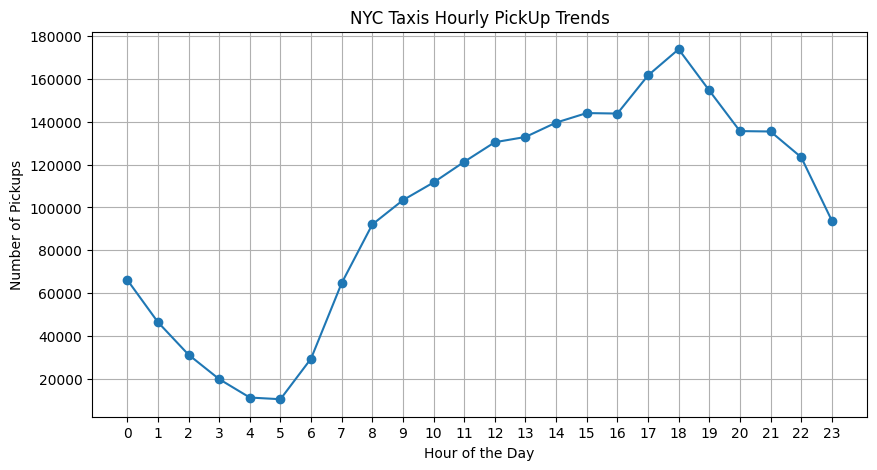

In [68]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pick_up_hour'] = df['tpep_pickup_datetime'].dt.hour

## Aggregate the no of pickups per hour
nyc_hourly_trend = df['pick_up_hour'].value_counts().sort_index()

## Plot the hourly trend
plt.figure(figsize=(10, 5))
plt.plot(nyc_hourly_trend.index, nyc_hourly_trend.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('NYC Taxis Hourly PickUp Trends')
plt.xticks(range(24)) ## ensure all hours are displayed
plt.grid(True)
plt.show()


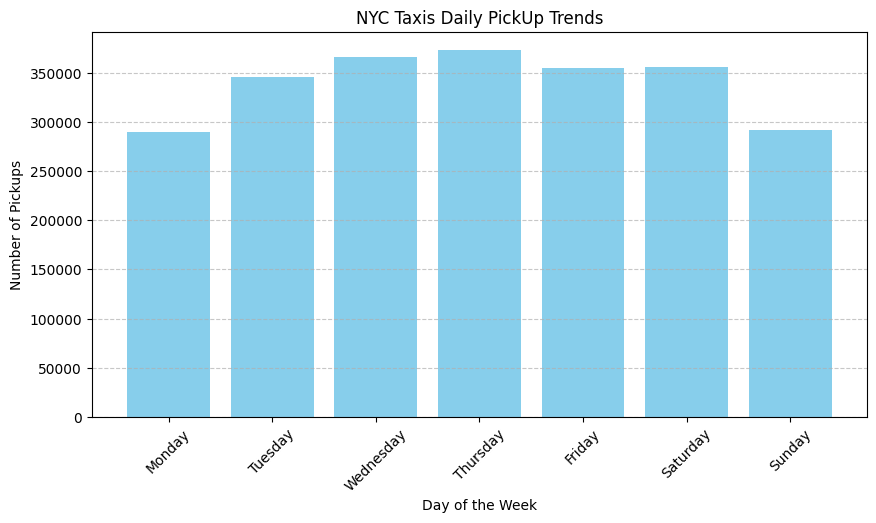

In [70]:
# Find and show the daily trends in taxi pickups (days of the week)

## Extract the day of the week from tpep_pickup_datetime
df['nyc_pickup_day'] = df['tpep_pickup_datetime'].dt.day_of_week

##Aggregate the number of pickups per day of the week
nyc_daily_trends = df['nyc_pickup_day'].value_counts().sort_index()

## Map day to day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nyc_daily_trends.index = [days[i] for i in nyc_daily_trends.index]

## Plot the daily trend
plt.figure(figsize=(10, 5))
plt.bar(nyc_daily_trends.index, nyc_daily_trends.values, color = 'skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('NYC Taxis Daily PickUp Trends')
plt.xticks(rotation=45) ## ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha =0.7)
plt.show()


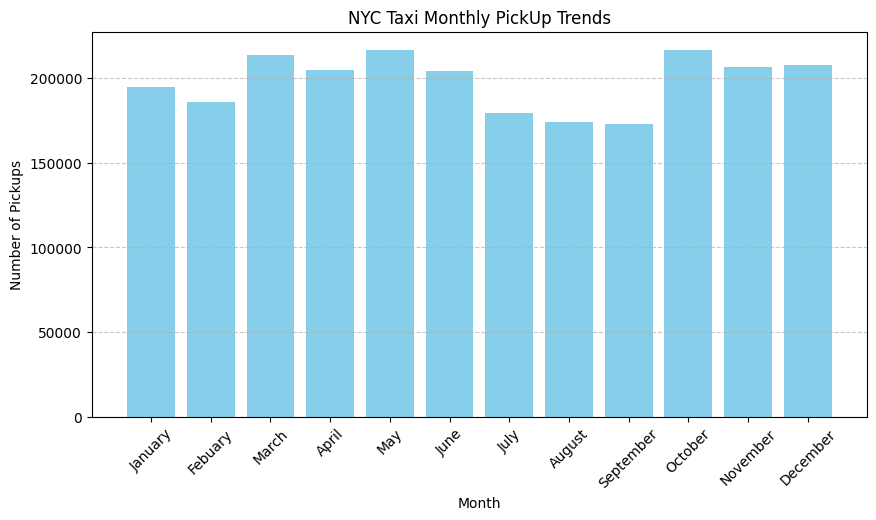

In [72]:
# Show the monthly trends in pickups

## Extract the month from tpep_pickup_datetime
df['nyc_pickup_month'] = df['tpep_pickup_datetime'].dt.month

##Aggregate the number of pickups per month
nyc_monthly_trends = df['nyc_pickup_month'].value_counts().sort_index()

## Map day to day names
months = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
nyc_monthly_trends.index = [months[i-1] for i in nyc_monthly_trends.index]

## Plot the daily trend
plt.figure(figsize=(10, 5))
plt.bar(nyc_monthly_trends.index, nyc_monthly_trends.values, color = 'skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('NYC Taxi Monthly PickUp Trends')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha =0.7)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [73]:
# Analyse the above parameters
zero_negative_values = {
    'fare_amount': (df['fare_amount'] <=0).sum(),
    'tip_amount': (df['tip_amount'] <=0).sum(),
    'total_amount': (df['total_amount'] <=0).sum(),
    'trip_distance': (df['trip_distance'] <=0).sum(),
}
zero_negative_values



{'fare_amount': 745,
 'tip_amount': 534139,
 'total_amount': 468,
 'trip_distance': 0}

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
# Yes, the data in the above columns data should not be zero as these are invalid records.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [74]:
# Create a df with non zero entries for the selected parameters.
df1 = df[
     (df['fare_amount'] > 0) &
     (df['tip_amount'] > 0) &
      (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

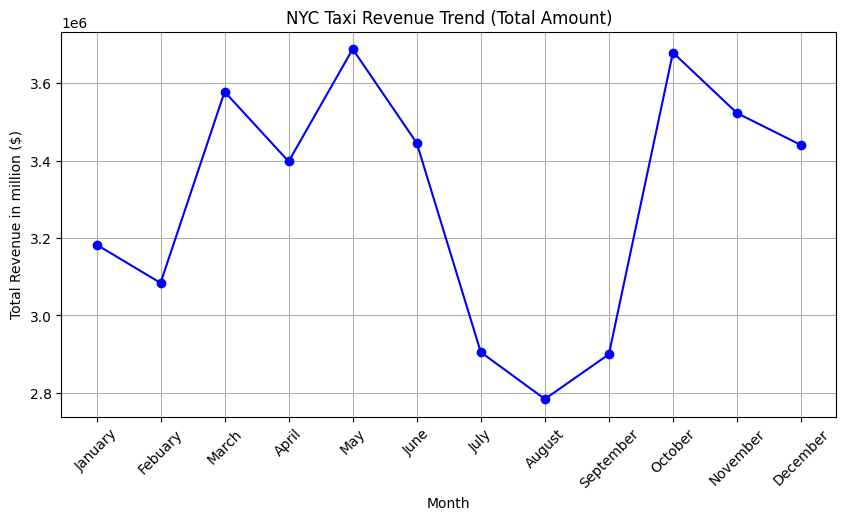

In [76]:
# Group data by month and analyse monthly revenue
nyc_monthly_revenue = df1.groupby(df1['tpep_pickup_datetime'].dt.month)['total_amount'].sum()
nyc_monthly_revenue

## Map the months to month names
nyc_monthly_revenue.index = [months[i-1] for i in nyc_monthly_revenue.index]

## Plot the monthly revendue trend
plt.figure(figsize=(10, 5))
plt.plot(nyc_monthly_revenue.index, nyc_monthly_revenue.values, marker = 'o', linestyle= '-', color ='Blue')
plt.xlabel('Month')
plt.ylabel('Total Revenue in million ($)')
plt.title('NYC Taxi Revenue Trend (Total Amount)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

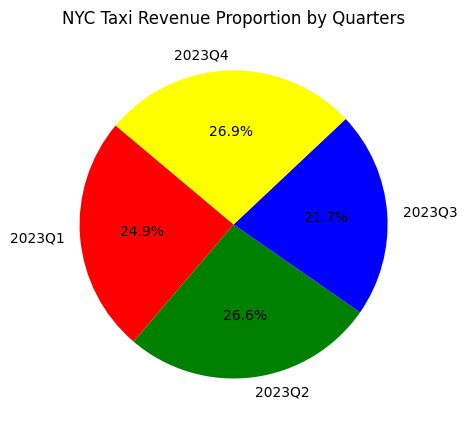

In [78]:
# Calculate proportion of each quarter
df1['nyc_quarter'] = df1['tpep_pickup_datetime'].dt.to_period('Q')

## Group By quarter and sum the total_amount for revenue proportion
nyc_quaterly_revenue = df1.groupby('nyc_quarter')['total_amount'].sum()

## Calculate the proportion
nyc_quaterly_proportion = (nyc_quaterly_revenue / nyc_quaterly_revenue.sum()) * 100
nyc_quaterly_proportion

## Plot the revenue proportion value
plt.figure(figsize=(8, 5))
plt.pie(nyc_quaterly_proportion, labels=nyc_quaterly_proportion.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'], startangle=140)
plt.title('NYC Taxi Revenue Proportion by Quarters')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

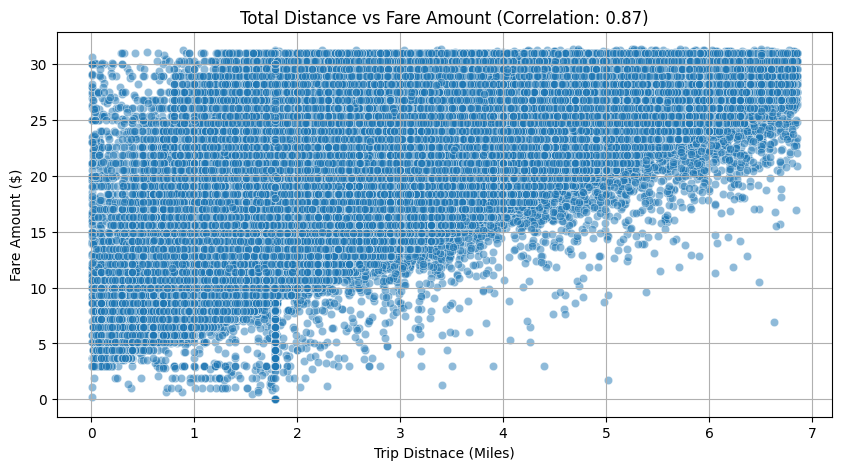

0.8749207611340881

In [79]:
# Show how trip fare is affected by distance
nyc_correlation_value = df1['trip_distance'].corr(df1['fare_amount'])

## Scatter Plot to visualize the releationship
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x = 'trip_distance', y = 'fare_amount', alpha = 0.5)
plt.xlabel('Trip Distnace (Miles)')
plt.ylabel('Fare Amount ($)')
plt.title(f'Total Distance vs Fare Amount (Correlation: {nyc_correlation_value:.2f})')
plt.grid(True)
plt.show()

nyc_correlation_value


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

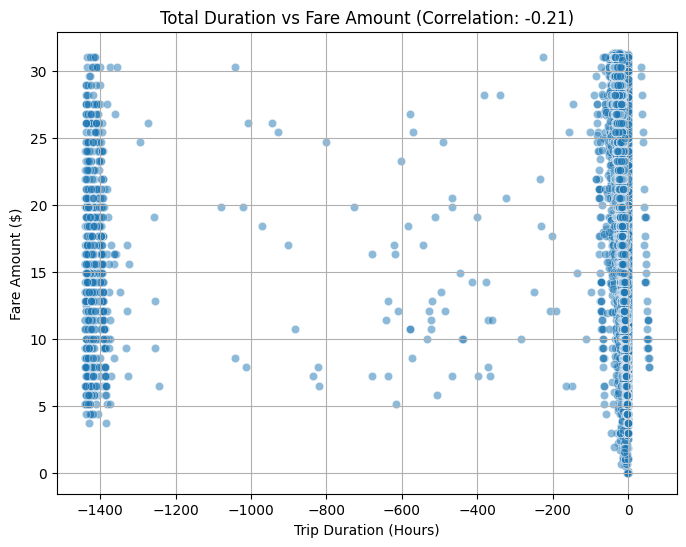

-0.2101959197488934

In [80]:
# Show relationship between fare and trip duration
df1['trip_duration'] = (df1['tpep_pickup_datetime'] - df1['tpep_dropoff_datetime']).dt.total_seconds() / 60
nyc_correlation_duration_fare_value = df1['trip_duration'].corr(df1['fare_amount'])

## Scatter Plot to visualize the releationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x = 'trip_duration', y = 'fare_amount', alpha = 0.5)
plt.xlabel('Trip Duration (Hours)')
plt.ylabel('Fare Amount ($)')
plt.title(f'Total Duration vs Fare Amount (Correlation: {nyc_correlation_duration_fare_value:.2f})')
plt.grid(True)
plt.show()

nyc_correlation_duration_fare_value


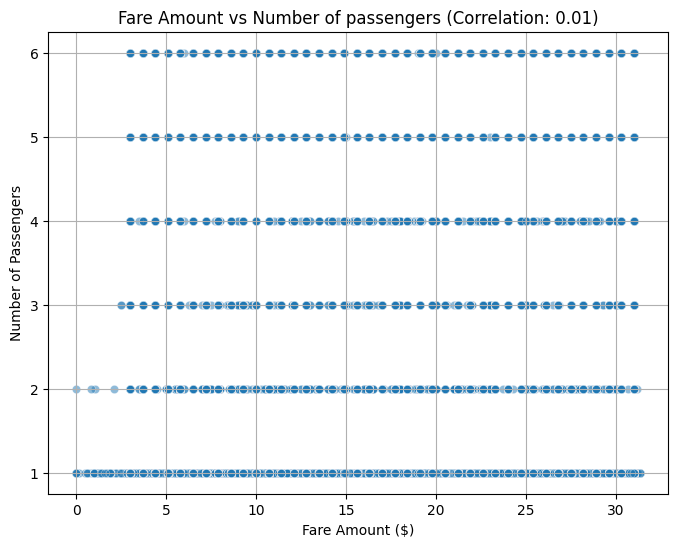

0.012709422464272807

In [81]:
# Show relationship between fare and number of passengers
nyc_correlation_fare_passenger_count_value = df1['fare_amount'].corr(df1['passenger_count'])

## Scatter Plot to visualize the releationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x = 'fare_amount', y = 'passenger_count', alpha = 0.5)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Number of Passengers')
plt.title(f'Fare Amount vs Number of passengers (Correlation: {nyc_correlation_fare_passenger_count_value:.2f})')
plt.grid(True)
plt.show()

nyc_correlation_fare_passenger_count_value


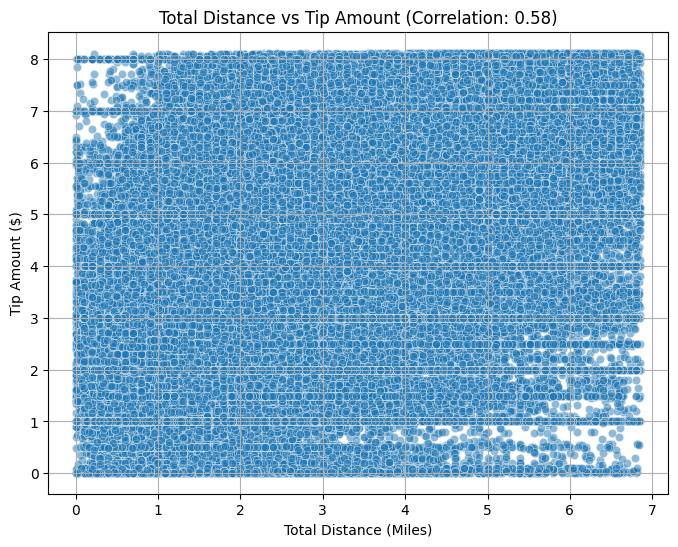

0.5826658926260395

In [82]:
# Show relationship between tip and trip distance
nyc_correlation_trip_tip_amount_value = df1['trip_distance'].corr(df1['tip_amount'])

## Scatter Plot to visualize the releationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x = 'trip_distance', y = 'tip_amount', alpha = 0.5)
plt.xlabel('Total Distance (Miles)')
plt.ylabel('Tip Amount ($)')
plt.title(f'Total Distance vs Tip Amount (Correlation: {nyc_correlation_trip_tip_amount_value:.2f})')
plt.grid(True)
plt.show()

nyc_correlation_trip_tip_amount_value


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [83]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mode = df1['payment_type'].mode()[0]
df1['payment_type'].fillna(payment_type_mode, inplace=True)

payment_type_distribution = df1['payment_type'].value_counts(normalize=True) * 100
payment_type_distribution

payment_type
1    97.546344
5     2.444922
3     0.005588
2     0.001682
4     0.001465
Name: proportion, dtype: float64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



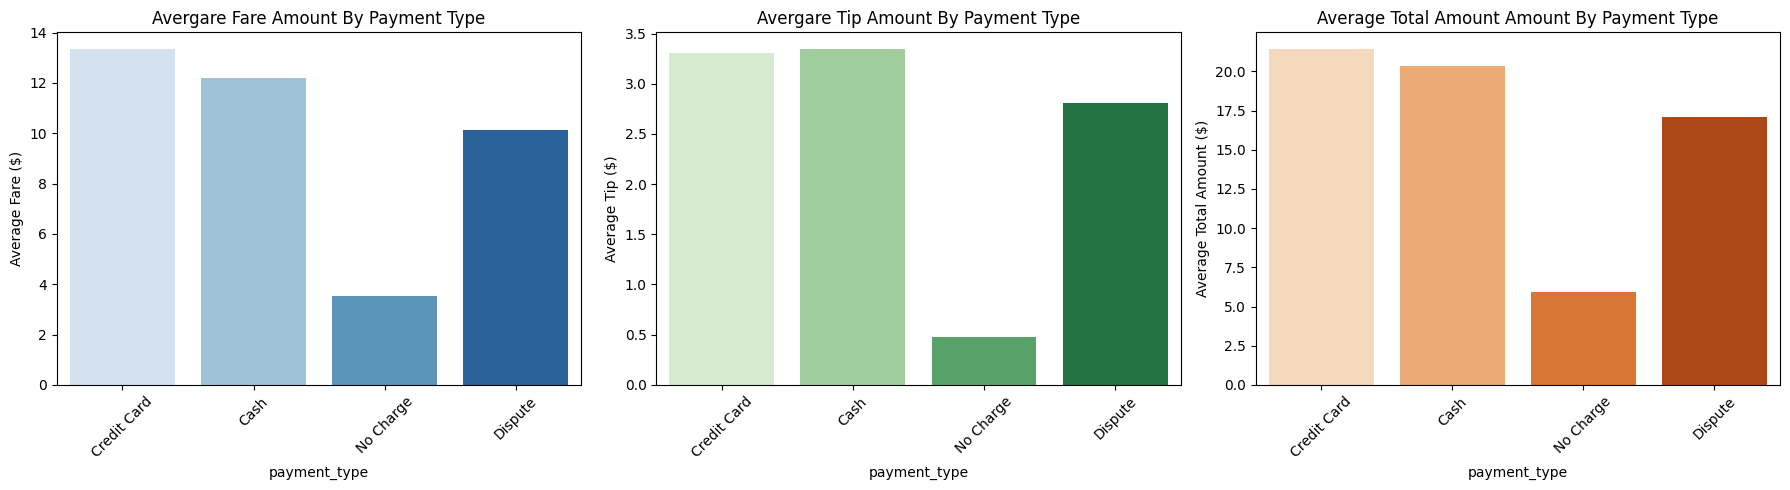

In [85]:
# Filter the valid payment type to find the different ananlysis with respect to fare amount, tip amout and total amount.
valid_payment_type = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
df_cleaned = df1[df1['payment_type'].isin(valid_payment_type.keys())]

## Group by payment type and calculate statistics
payment_analysis = df_cleaned.groupby('payment_type').agg(
    avg_fare = ('fare_amount', 'mean'),
    avg_tip = ('tip_amount', 'mean'),
    avg_total = ('total_amount', 'mean'),
    count = ('payment_type', 'count')
)

payment_analysis.index = payment_analysis.index.map(valid_payment_type)

## Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

## Avergare Fare Amount
sns.barplot(x=payment_analysis.index, y=payment_analysis['avg_fare'], ax=axes[0], palette='Blues')
axes[0].set_title('Avergare Fare Amount By Payment Type')
axes[0].set_ylabel('Average Fare ($)')
axes[0].set_xticklabels(payment_analysis.index, rotation=45)

## Average Tip Amount
sns.barplot(x=payment_analysis.index, y=payment_analysis['avg_tip'], ax=axes[1], palette='Greens')
axes[1].set_title('Avergare Tip Amount By Payment Type')
axes[1].set_ylabel('Average Tip ($)')
axes[1].set_xticklabels(payment_analysis.index, rotation=45)

## Average Tip Amount
sns.barplot(x=payment_analysis.index, y=payment_analysis['avg_total'], ax=axes[2], palette='Oranges')
axes[2].set_title('Average Total Amount Amount By Payment Type')
axes[2].set_ylabel('Average Total Amount ($)')
axes[2].set_xticklabels(payment_analysis.index, rotation=45)

plt.tight_layout()
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [86]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [88]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/EDA_Assignment/NYC_Taxi_Assignment/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


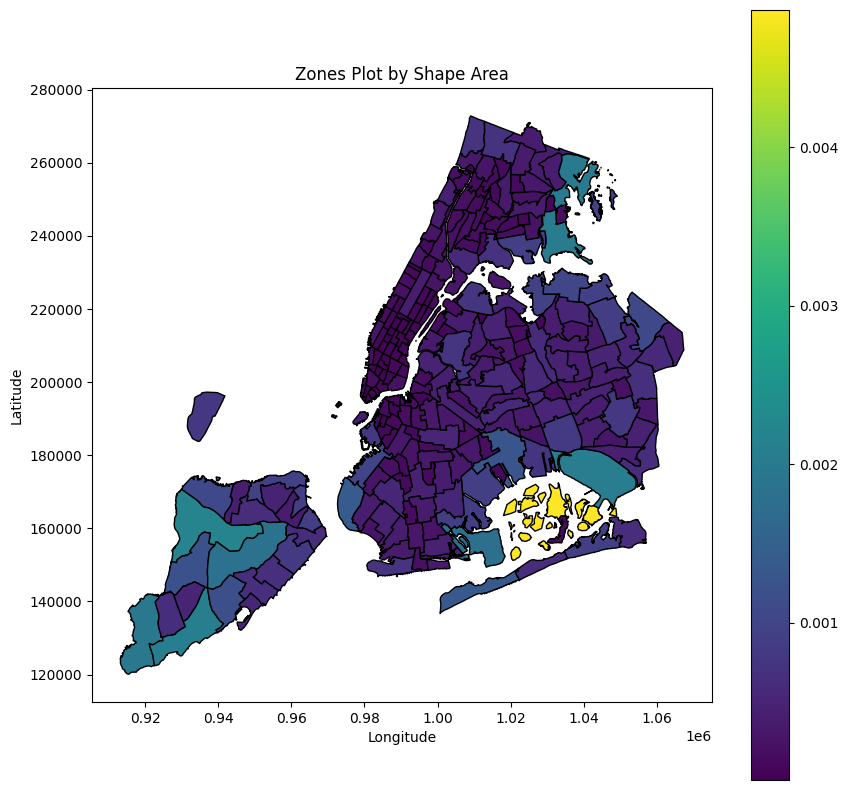

In [89]:
print(zones.info())

# Plot the zones by shape area
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zones.plot(ax=ax, column='Shape_Area', legend=True, cmap='viridis', edgecolor='black')

# Set plot title and labels
ax.set_title('Zones Plot by Shape Area')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

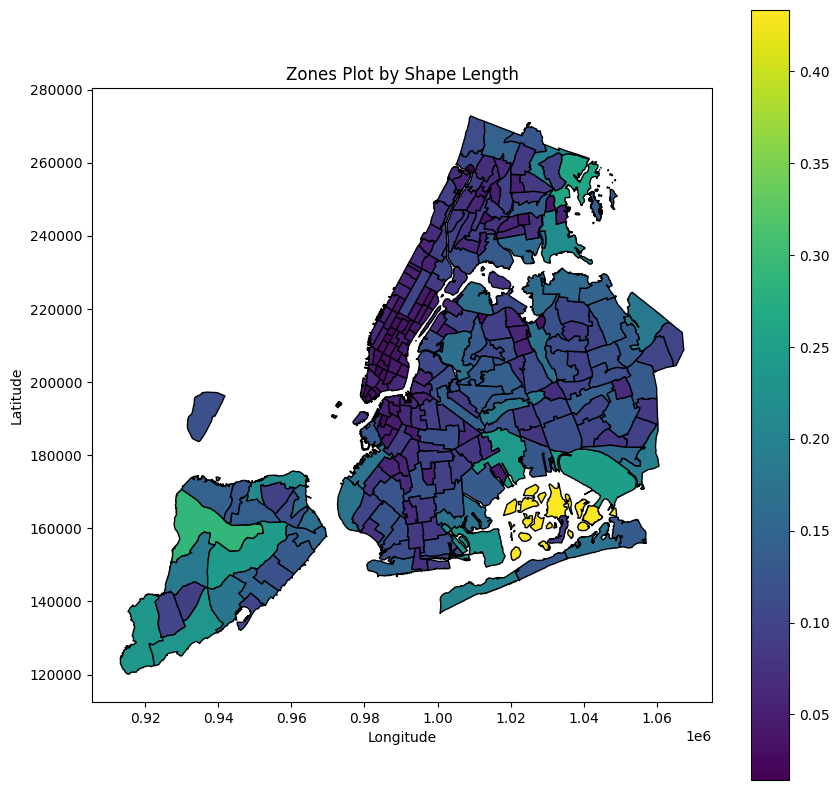

In [90]:
# Plot the zones by shape length
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zones.plot(ax=ax, column='Shape_Leng', legend=True, cmap='viridis', edgecolor='black')

# Set plot title and labels
ax.set_title('Zones Plot by Shape Length')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

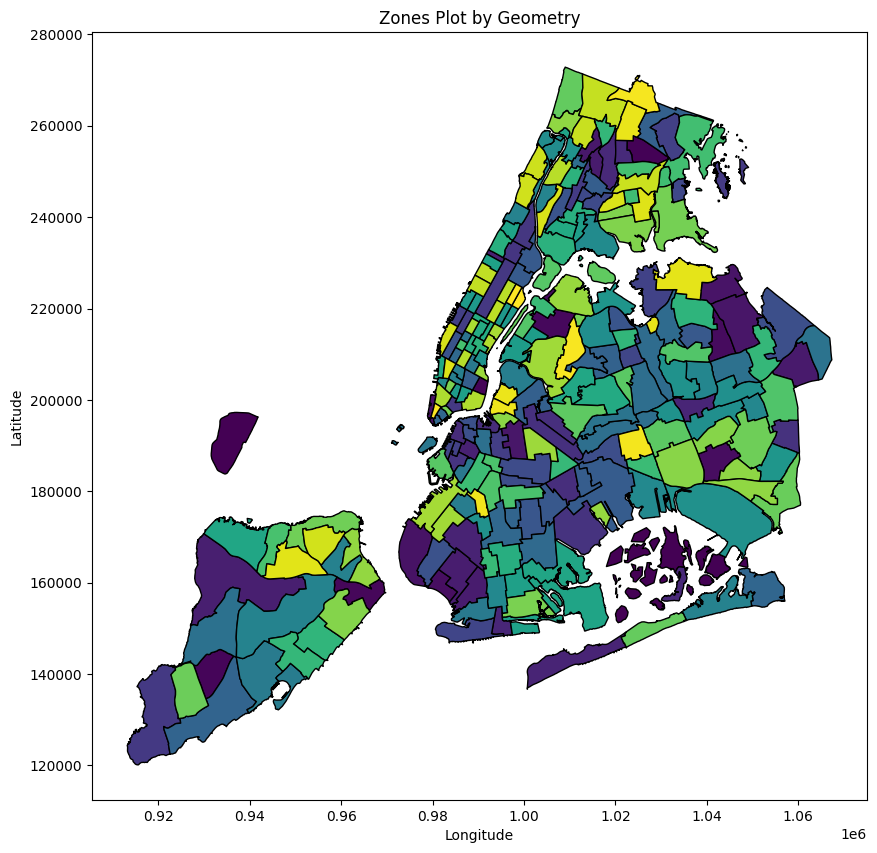

In [91]:
# Plot the zones by Geometry
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(ax=ax, edgecolor='black', cmap='viridis')

# Set plot title and labels
ax.set_title('Zones Plot by Geometry')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [92]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df1.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.24         1.0                  N           161           237   
1           1.59         1.0                  N            79           164   
2           3.16         1.0                  N            79           256   
3           0.90         1.0                  N           148           114   
4           2.78         1.0                  N            79           186   

   payment_type  ...  nyc_pickup_month  nyc_quarter  trip_duration  OBJECTID  \
0             1  ...                 1       2023Q1      -5.083333     161.0   
1             1  ...                 1       2023Q1     -10.516667      79.0   
2             1  ...                 1       2023Q1     -15.883333      79.0   
3             1  ...                 1       2023Q1      -7.166667     148.0   
4             1  ...                 1       2023Q1     -20.266667      79.0   

   Shape_Leng  Shape_Area             zone  LocationID    borough  \
0    0.035804    0.000072   Midtown Center       161.0  Manhattan   
1    0.042625    0.000108     East Village        79.0  Manhattan   
2    0.042625    0.000108     East Village        79.0  Manhattan   
3    0.039131    0.000070  Lower East Side       148.0  Manhattan   
4    0.042625    0.000108     East Village        79.0  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((988746.067 202151.955, 988733.885 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988552.836 201677.665, 988387.669 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [93]:
# Group data by location and calculate the number of trips
if 'LocationID' not in merged_df.columns:
    raise KeyError('Column LocationID not found')
number_of_trips = pd.DataFrame(merged_df.groupby('LocationID').size(), columns=['total_trips']).reset_index()
number_of_trips


LocationID  total_trips
0           1.0           15
1           3.0            2
2           4.0         2319
3           7.0          487
4           9.0            3
..          ...          ...
214       259.0            4
215       260.0           70
216       261.0         8090
217       262.0        28424
218       263.0        40189

[219 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [94]:
# Merge trip counts back to the zones GeoDataFrame
if 'LocationID' not in zones.columns:
    raise KeyError('Column LocationID not found')
merged_zones = zones.merge(number_of_trips, left_on='LocationID', right_on='LocationID', how='left')
merged_zones



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     total_trips  
0           15.0  
1            NaN  
2            2.0  
3         2319.0  
4            NaN  
..           ...  
258          4.0  
259         70.0  
260       8090.0  
261      28424.0  
262      40189.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

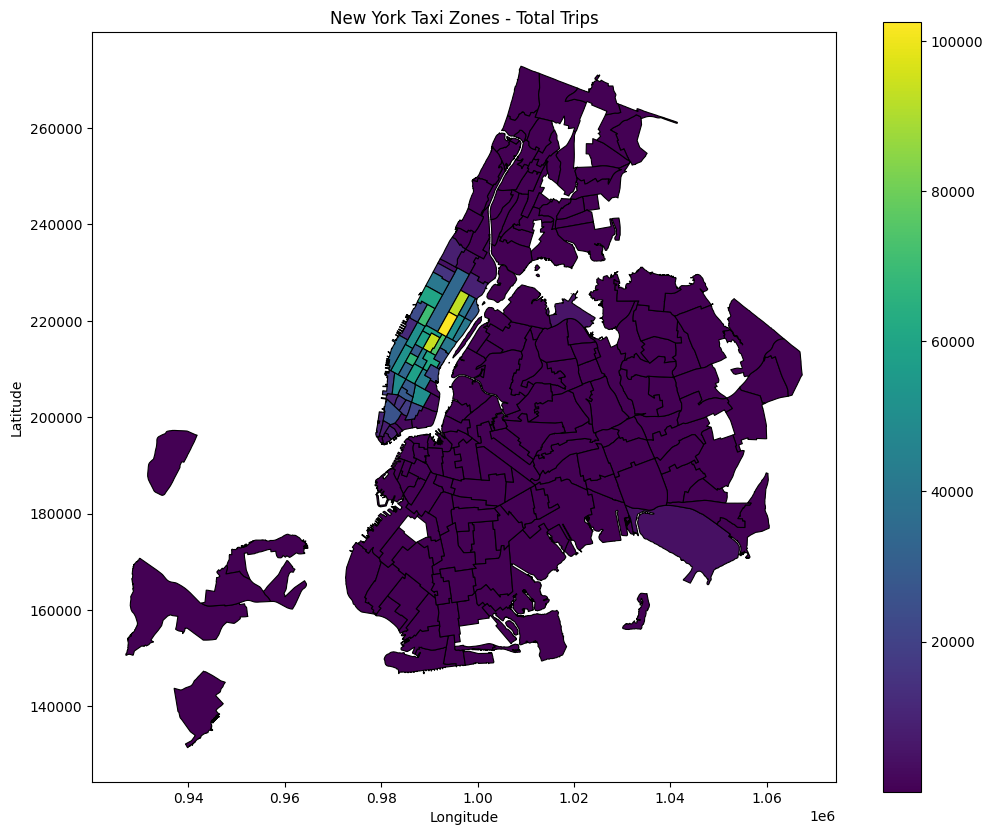

In [95]:
# Define figure and axis
fig, axes = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
merged_zones.plot(column='total_trips', cmap='viridis', linewidth=0.8, edgecolor='black', legend=True, ax=axes)
# Set plot title and labels
axes.set_title('New York Taxi Zones - Total Trips')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
plt.show()


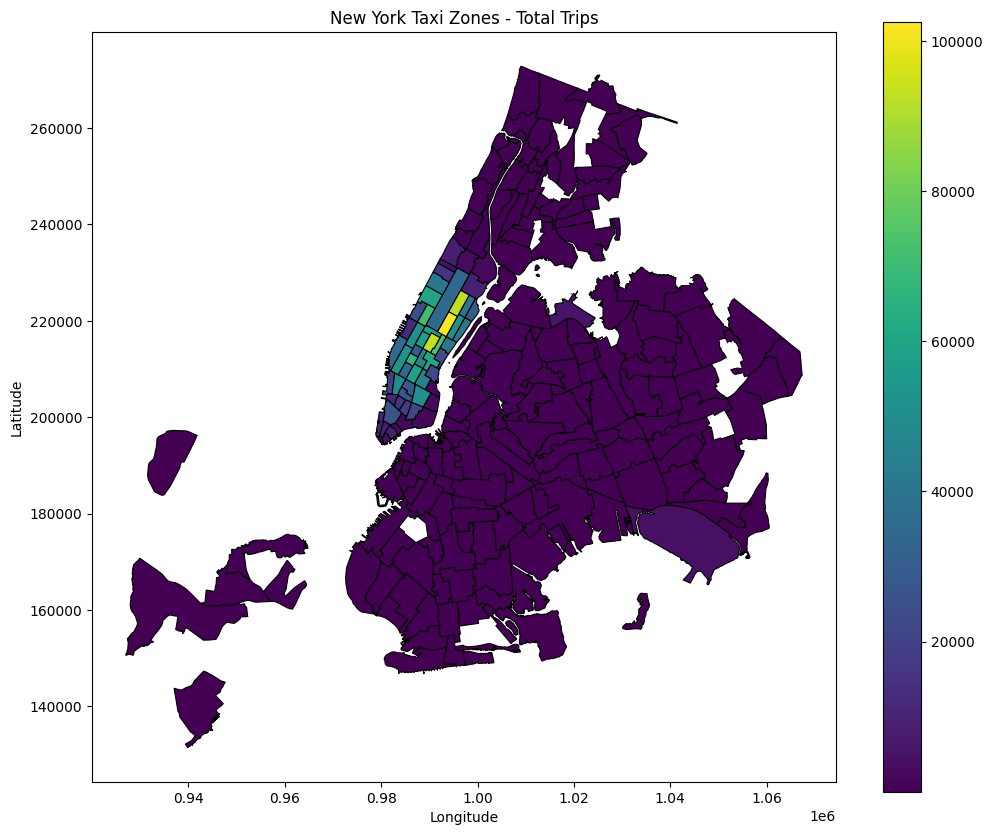

In [96]:
# can you try displaying the zones DF sorted by the number of trips?

# Define figure and axis
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

sorted_merged_zones = merged_zones.sort_values(by='total_trips', ascending=True)
# Plot the map and display it
sorted_merged_zones.plot(column='total_trips', cmap='viridis', linewidth=0.8, edgecolor='black', legend=True, ax=axes)
# Set plot title and labels
axes.set_title('New York Taxi Zones - Total Trips')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
plt.show()



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



In [97]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])
merged_df['tpep_dropoff_datetime'] = pd.to_datetime(merged_df['tpep_dropoff_datetime'])

# Calculate trip duration
merged_df['trip_duration_min'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Avoid division by zero
df = merged_df[merged_df['trip_duration_min'] > 0]

# Calculate speed in mph
df['speed_mph'] = df['trip_distance'] / (df['trip_duration_min'] / 60)

# Classify time of the day
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Create time_of_day column
df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(classify_time)

# Find the slowest routes
slowest_routes = (
    df.groupby(['PULocationID', 'DOLocationID', 'time_of_day'])
    .agg(avg_speed=('speed_mph', 'mean'), trip_count=('speed_mph', 'count'))
    .reset_index()
    .sort_values(by='avg_speed', ascending=True)
).reset_index()

slowest_routes

index  PULocationID  DOLocationID time_of_day    avg_speed  trip_count
0       8526           132           149   Afternoon     0.016925           1
1       3399            61           145   Afternoon     0.018987           1
2       2761            48           184       Night     0.127919           1
3      14800           195            50     Evening     0.134694           1
4      19914           251            23       Night     0.190684           1
...      ...           ...           ...         ...          ...         ...
21538   2950            49           264     Morning  2148.000000           1
21539  15487           216           264       Night  2148.000000           1
21540   4323            71            72       Night  2148.000000           1
21541  10891           145           264       Night  3222.000000           1
21542      4             1           264       Night  3222.000000           1

[21543 rows x 6 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



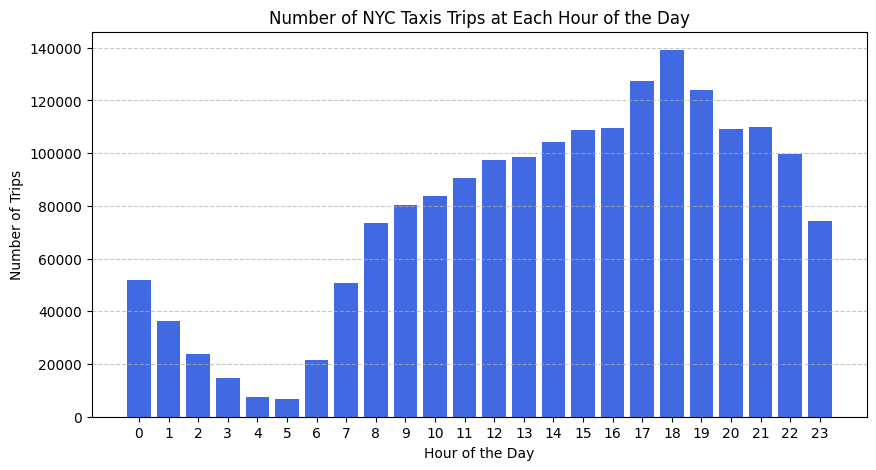

In [98]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])

merged_df['pick_up_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

trip_per_hour = merged_df['pick_up_hour'].value_counts().sort_index()

## Plot the number of trips
plt.figure(figsize=(10, 5))
plt.bar(trip_per_hour.index, trip_per_hour.values, color='royalblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of NYC Taxis Trips at Each Hour of the Day')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [99]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = merged_df['pick_up_hour'].value_counts().sort_values(ascending=False)

sample_fraction.head(5)



pick_up_hour
18    139130
17    127482
19    124000
21    109756
16    109697
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



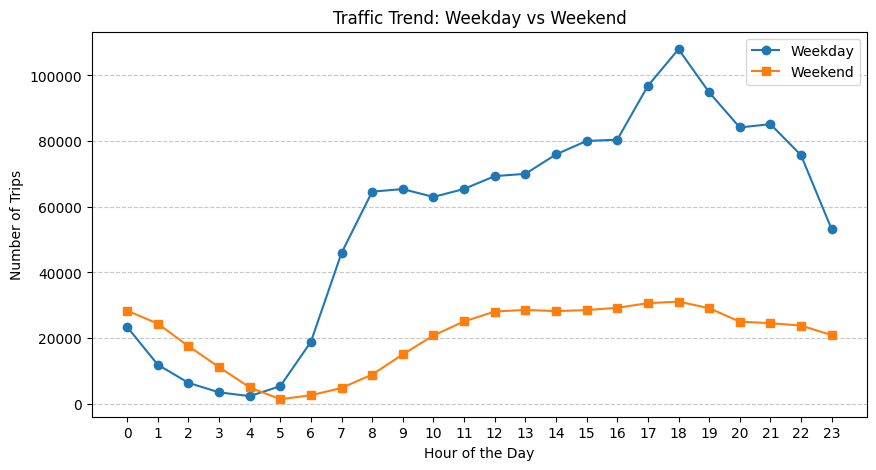

In [100]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])

merged_df['pick_up_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.day_of_week

merged_df['day_type'] = merged_df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

## Count trip per hour of the weekdays and weekends
traffic_trends = merged_df.groupby(['day_type', 'pick_up_hour']).size().unstack(level=0)

## Plot the trffic trend
plt.figure(figsize=(10, 5))
plt.plot(traffic_trends.index, traffic_trends['Weekday'], label='Weekday', marker = 'o', linestyle='-')
plt.plot(traffic_trends.index, traffic_trends['Weekend'], label='Weekend', marker = 's', linestyle='-')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Traffic Trend: Weekday vs Weekend')
plt.xticks(range(0,24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



In [101]:
# Count to 10 pickup zones
top_pickup_zones = merged_df['PULocationID'].value_counts().reset_index()
top_pickup_zones.columns = ['PULocationID', 'pickup_count']
top_pickup_zones = top_pickup_zones.head(10)
top_pickup_zones

top_dropoff_zones = merged_df['DOLocationID'].value_counts().reset_index()
top_dropoff_zones.columns = ['DOLocationID', 'dropoff_count']
top_dropoff_zones = top_dropoff_zones.head(10)
top_dropoff_zones

print('Top 10 PickUp zones:\n', top_pickup_zones)
print('Bottom 10 Dropoff zones:\n', top_dropoff_zones)


Top 10 PickUp zones:
    PULocationID  pickup_count
0           237        102521
1           161         93947
2           236         92901
3           162         74047
4           142         70842
5           186         67393
6           170         61444
7           239         60445
8           234         58348
9           163         58002
Bottom 10 Dropoff zones:
    DOLocationID  dropoff_count
0           236          97633
1           237          91624
2           161          77398
3           170          60861
4           239          60525
5           142          60049
6           162          57553
7           141          57047
8           234          50942
9            68          50705


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



Top 10 PickUp/Dropoff ratio:
      LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
121         138        5543.0          443.0             12.512415
115         132        4297.0          474.0              9.065401
69           77           4.0            1.0              4.000000
62           70         754.0          268.0              2.813433
90          101           4.0            2.0              2.000000
133         150           2.0            1.0              2.000000
59           67           4.0            2.0              2.000000
164         185           2.0            1.0              2.000000
165         186       67393.0        42348.0              1.591409
99          114       28568.0        20411.0              1.399637
Bottom 10 PickUp/Dropoff ratio:
      LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
100         115           1.0            0.0                   0.0
185         210           0.0            1.0                   0.0

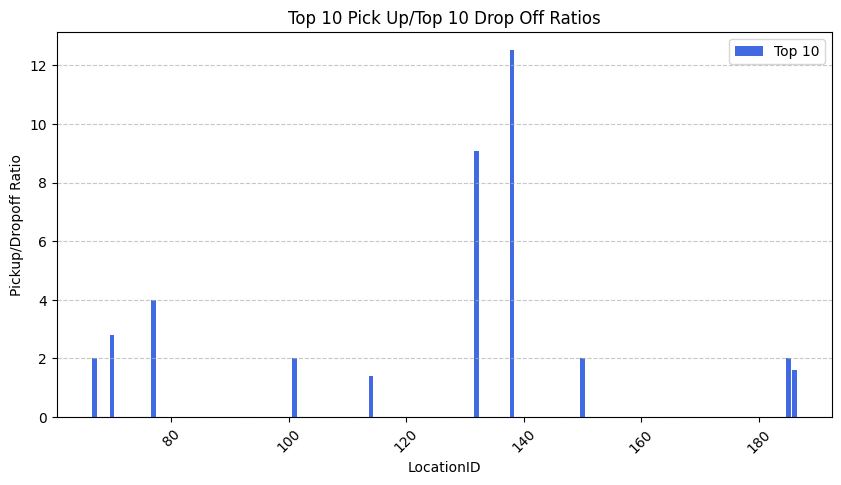

In [105]:
pickup_counts = merged_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

##Count to 10 dropoff zones
dropoff_counts = merged_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

location_counts = pd.merge(pickup_counts, dropoff_counts, on = 'LocationID', how='outer').fillna(0)

location_counts['pickup_dropoff_ratio'] = location_counts['pickup_count'] / location_counts['dropoff_count']
location_counts.replace([float('inf'), -float('inf')], 0, inplace=True)

top_10_ratio = location_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = location_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print('Top 10 PickUp/Dropoff ratio:\n', top_10_ratio)
print('Bottom 10 PickUp/Dropoff ratio:\n', bottom_10_ratio)

# plot pickup and drop off ratio
plt.figure(figsize=(10, 5))
plt.bar(top_10_ratio['LocationID'], top_10_ratio['pickup_dropoff_ratio'], label='Top 10', color='royalblue')
plt.xlabel('LocationID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Top 10 Pick Up/Top 10 Drop Off Ratios')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [106]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])

merged_df['pick_up_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

night_trips = merged_df[(merged_df['pick_up_hour'] >= 23) | (merged_df['pick_up_hour'] <= 5)]

top_night_pickups = night_trips['PULocationID'].value_counts().head(10)
top_night_dropoff = night_trips['DOLocationID'].value_counts().head(10)

print('Top 10 PickUp Zones at Night (11 PM to 5 AM):\n', top_night_pickups)
print('Top 10 Dropoff Zones at Night (11 PM to 5 AM):\n', top_night_dropoff)

Top 10 PickUp Zones at Night (11 PM to 5 AM):
 PULocationID
79     18585
249    15017
148    11394
48     10959
114    10485
230     7609
186     7365
164     6828
107     6624
68      6460
Name: count, dtype: int64
Top 10 Dropoff Zones at Night (11 PM to 5 AM):
 DOLocationID
79     9953
48     7431
170    7400
107    7062
68     6476
141    6458
249    6110
263    6044
229    5261
236    5156
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



Revenue share (Night Time vs DayTime) time_period
DayTime      88.467843
NightTime    11.532157
Name: total_amount, dtype: float64


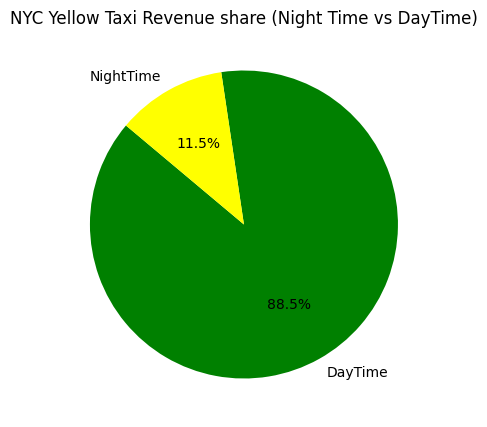

In [107]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])

merged_df['pick_up_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

## Classify the trips for daytime (5 AM to 11 PM) and night time (11 PM to 5 AM)
merged_df['time_period'] = merged_df['pick_up_hour'].apply(lambda x: "NightTime" if (x >= 23 or x<5) else 'DayTime')

revenue_share = merged_df.groupby('time_period')['total_amount'].sum()

revenue_share_percentage = (revenue_share / revenue_share.sum()) * 100

print('Revenue share (Night Time vs DayTime)', revenue_share_percentage)

## Plot revenue share percentage
plt.figure(figsize=(8, 5))
plt.pie(revenue_share_percentage, labels=revenue_share_percentage.index, autopct='%1.1f%%', colors=['green', 'yellow'], startangle=140)
plt.title('NYC Yellow Taxi Revenue share (Night Time vs DayTime)')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

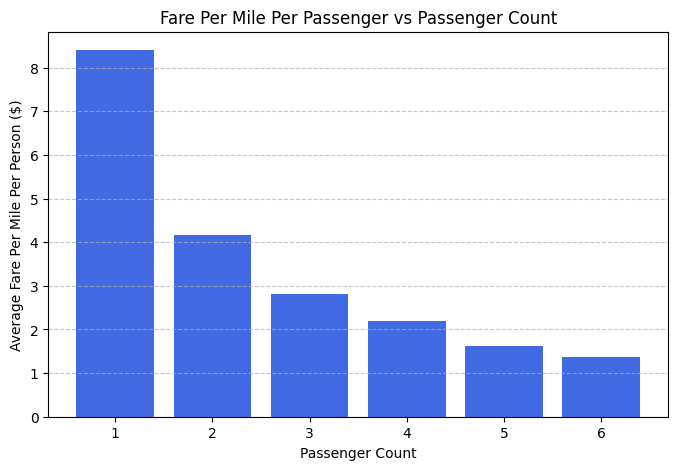

In [113]:
# Analyse the fare per mile per passenger for different passenger counts
valid_trips = merged_df[(merged_df['trip_distance'] > 0) & (merged_df['fare_amount'] > 0) & (merged_df['passenger_count'] > 0)]

## Calculate fare per passenger
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count'])

## Group by passenger count and compute the avegare fare per mile per passenger
fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

fare_analysis = fare_analysis.sort_values(by='passenger_count')

## Plot result
plt.figure(figsize=(8, 5))
plt.bar(fare_analysis['passenger_count'], fare_analysis['fare_per_mile_per_passenger'], color='royalblue')

plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Per Mile Per Person ($)')
plt.title('Fare Per Mile Per Passenger vs Passenger Count')
plt.xticks(fare_analysis['passenger_count'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [109]:
# Compare the average fare per mile for different days and for different times of the day



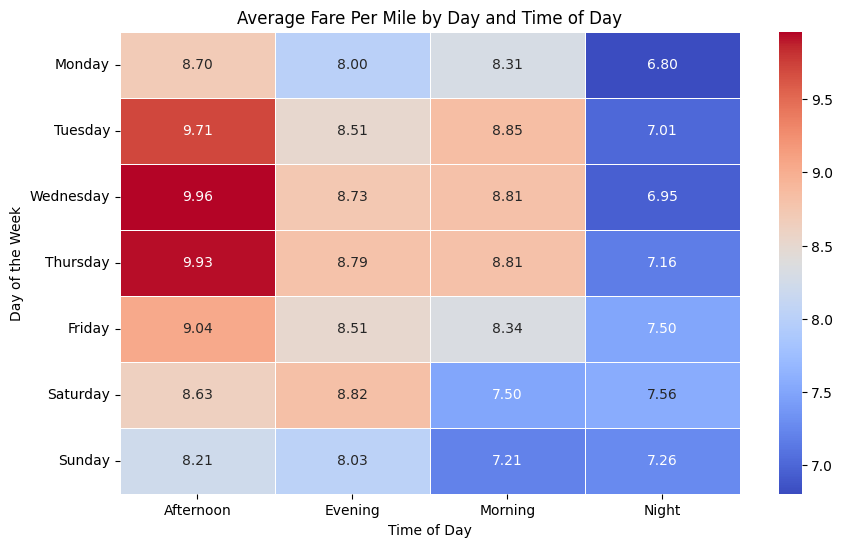

In [114]:
merged_df["tpep_pickup_datetime"] = pd.to_datetime(merged_df["tpep_pickup_datetime"])

# Extract day of the week (0=Monday, 6=Sunday) and hour of the day
merged_df["day_of_week"] = merged_df["tpep_pickup_datetime"].dt.dayofweek
merged_df["pickup_hour"] = merged_df["tpep_pickup_datetime"].dt.hour

# Define time of day
def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply time classification
merged_df["time_of_day"] = merged_df["pickup_hour"].apply(classify_time)

# Remove invalid records (zero or negative distance or fare or passenger count)
valid_trips = merged_df[(merged_df["trip_distance"] > 0) & (merged_df["fare_amount"] > 0) & (merged_df["passenger_count"] > 0)]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by day and time of day to compute average fare per mile
fare_comparison = valid_trips.groupby(["day_of_week", "time_of_day"])["fare_per_mile"].mean().reset_index()

# Pivot table for heatmap visualization
fare_pivot = fare_comparison.pivot(index="day_of_week", columns="time_of_day", values="fare_per_mile")

# Set day labels
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fare_pivot.index = day_labels

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(fare_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Add labels and title
plt.xlabel("Time of Day")
plt.ylabel("Day of the Week")
plt.title("Average Fare Per Mile by Day and Time of Day")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [110]:
# Compare fare per mile for different vendors



Fare Per Mile by Vendor:
    VendorID  fare_per_mile
1         2       8.440101
0         1       8.275312


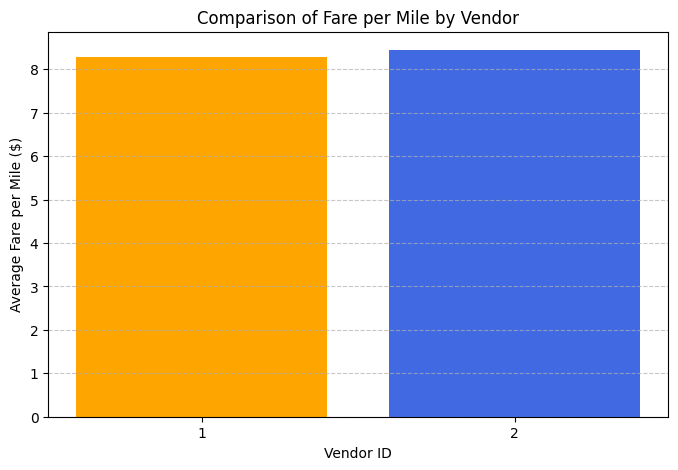

In [115]:
# Remove invalid trip records (zero or negative distance or fare)
valid_trips = merged_df[(merged_df["trip_distance"] > 0) & (merged_df["fare_amount"] > 0) & (merged_df["passenger_count"] > 0)]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID and compute average fare per mile
fare_by_vendor = valid_trips.groupby("VendorID")["fare_per_mile"].mean().reset_index()

# Sort results
fare_by_vendor = fare_by_vendor.sort_values(by="fare_per_mile", ascending=False)

# Display results
print("Fare Per Mile by Vendor:\n", fare_by_vendor)

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(fare_by_vendor["VendorID"], fare_by_vendor["fare_per_mile"], color=["royalblue", "orange"])

# Add labels and title
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Comparison of Fare per Mile by Vendor")
plt.xticks(fare_by_vendor["VendorID"])  # Show vendor IDs as x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [111]:
# Defining distance tiers



Tiered Fare Per Mile Analysis:
    VendorID   distance_category  fare_per_mile
0         1     Long (>5 miles)       4.740214
1         1  Medium (2-5 miles)       6.284632
2         1    Short (≤2 miles)       9.306987
3         2     Long (>5 miles)       4.788603
4         2  Medium (2-5 miles)       6.434147
5         2    Short (≤2 miles)       9.653901


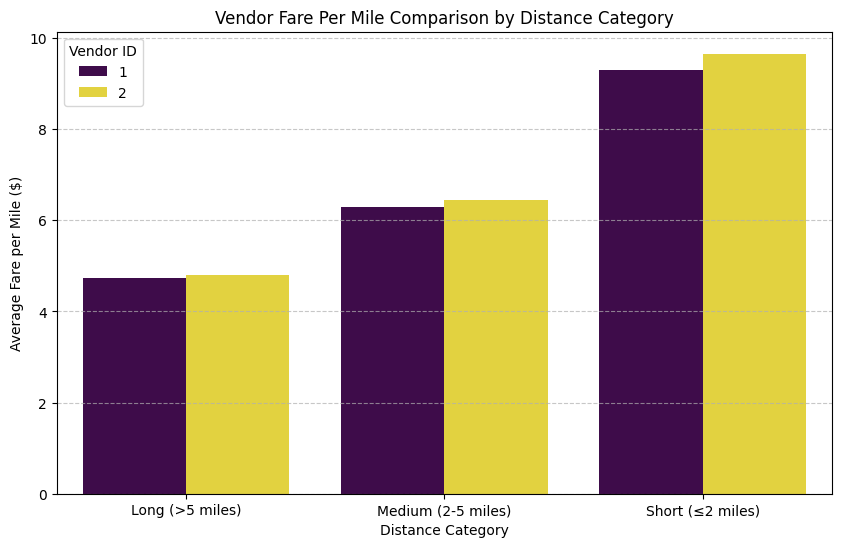

In [116]:
# Remove invalid trip records (zero or negative distance,  fare and(merged_df["fare_amount"] > 0)(merged_df["fare_amount"] > 0) passenger count)
valid_trips = merged_df[(merged_df["trip_distance"] > 0) & (merged_df["fare_amount"] > 0) & (merged_df["passenger_count"] > 0)]

# Create distance categories
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

valid_trips["distance_category"] = valid_trips["trip_distance"].apply(categorize_distance)

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID and distance category to compute average fare per mile
tiered_fare_analysis = valid_trips.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()

# Display results
print("Tiered Fare Per Mile Analysis:\n", tiered_fare_analysis)

# Plot results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=tiered_fare_analysis, palette="viridis")

# Add labels and title
plt.xlabel("Distance Category")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Vendor Fare Per Mile Comparison by Distance Category")
plt.legend(title="Vendor ID")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



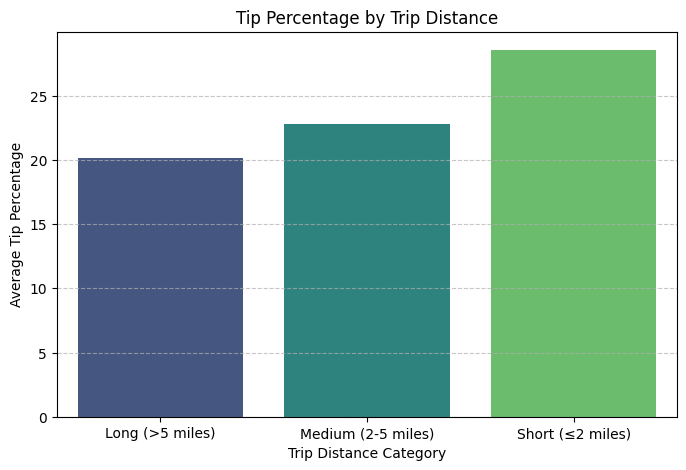

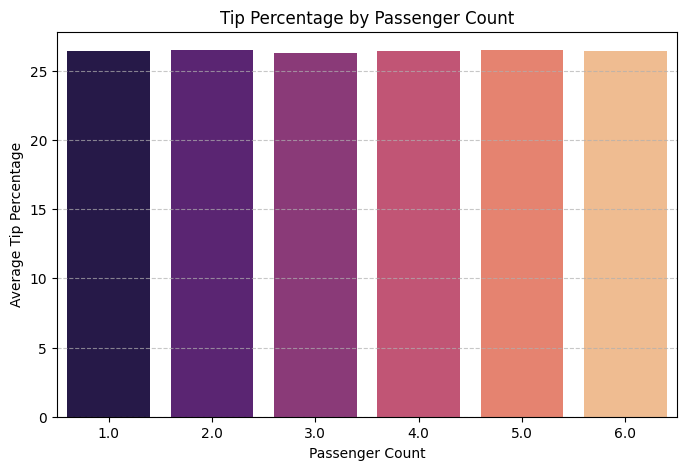

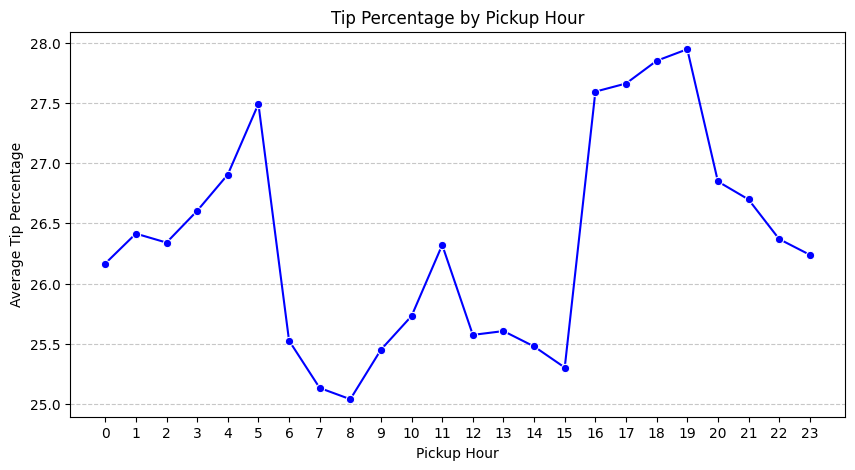

In [117]:
merged_df["tpep_pickup_datetime"] = pd.to_datetime(merged_df["tpep_pickup_datetime"])

# Remove invalid fare amounts to avoid division errors
valid_trips = merged_df[merged_df["fare_amount"] > 0]

# Calculate tip percentage
valid_trips["tip_percentage"] = (valid_trips["tip_amount"] / valid_trips["fare_amount"]) * 100

# Create distance categories
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

valid_trips["distance_category"] = valid_trips["trip_distance"].apply(categorize_distance)

# Extract hour of pickup
valid_trips["pickup_hour"] = valid_trips["tpep_pickup_datetime"].dt.hour

# Group by distance category and compute average tip percentage
tip_by_distance = valid_trips.groupby("distance_category")["tip_percentage"].mean().reset_index()

# Group by passenger count and compute average tip percentage
tip_by_passenger = valid_trips.groupby("passenger_count")["tip_percentage"].mean().reset_index()

# Group by pickup hour and compute average tip percentage
tip_by_hour = valid_trips.groupby("pickup_hour")["tip_percentage"].mean().reset_index()

# Plot Tip Percentage by Distance
plt.figure(figsize=(8, 5))
sns.barplot(x="distance_category", y="tip_percentage", data=tip_by_distance, palette="viridis")
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Trip Distance")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot Tip Percentage by Passenger Count
plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="tip_percentage", data=tip_by_passenger, palette="magma")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Passenger Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot Tip Percentage by Pickup Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="tip_percentage", data=tip_by_hour, marker="o", color="blue")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



                    Metric  Low Tip Trips  High Tip Trips
0                 Avg Fare      17.018858       11.327421
1        Avg Trip Distance       2.532898        1.526358
2         Avg Total Amount      22.915391       19.678780
3  Avg Trip Duration (min)      17.151745       10.646024


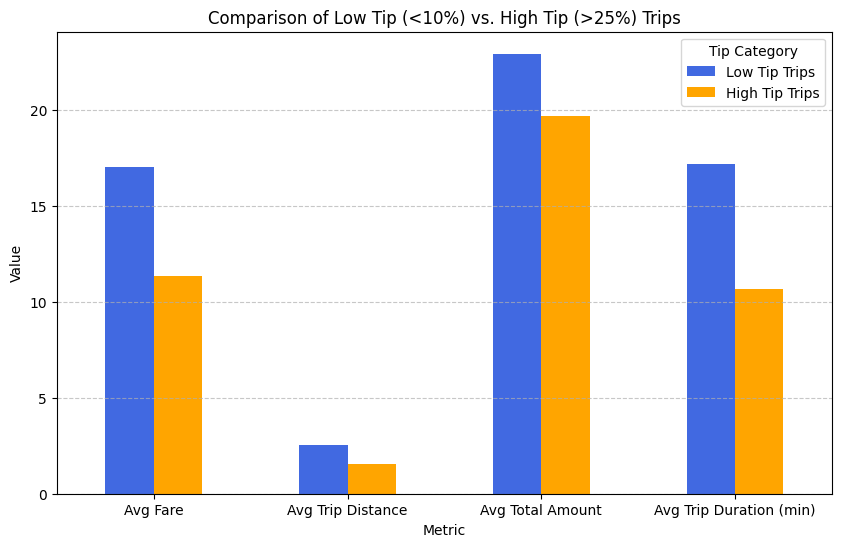

In [118]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
valid_trips = merged_df[merged_df["fare_amount"] > 0]

# Calculate tip percentage
valid_trips["tip_percentage"] = (valid_trips["tip_amount"] / valid_trips["fare_amount"]) * 100

# Define low-tip and high-tip trips
low_tip_trips = valid_trips[valid_trips["tip_percentage"] < 10]
high_tip_trips = valid_trips[valid_trips["tip_percentage"] > 25]

# Compare key statistics
comparison = pd.DataFrame({
    "Metric": ["Avg Fare", "Avg Trip Distance", "Avg Total Amount", "Avg Trip Duration (min)"],
    "Low Tip Trips": [
        low_tip_trips["fare_amount"].mean(),
        low_tip_trips["trip_distance"].mean(),
        low_tip_trips["total_amount"].mean(),
        ((low_tip_trips["tpep_dropoff_datetime"] - low_tip_trips["tpep_pickup_datetime"]).dt.total_seconds() / 60).mean()
    ],
    "High Tip Trips": [
        high_tip_trips["fare_amount"].mean(),
        high_tip_trips["trip_distance"].mean(),
        high_tip_trips["total_amount"].mean(),
        ((high_tip_trips["tpep_dropoff_datetime"] - high_tip_trips["tpep_pickup_datetime"]).dt.total_seconds() / 60).mean()
    ]
})

# Display the comparison table
print(comparison)

# Plot the comparison
comparison.set_index("Metric").plot(kind="bar", figsize=(10, 6), color=["royalblue", "orange"])
plt.title("Comparison of Low Tip (<10%) vs. High Tip (>25%) Trips")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Tip Category")

# Show the plot
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




Text(0.5, 1.0, 'Average Passenger Count by Hour and Day')

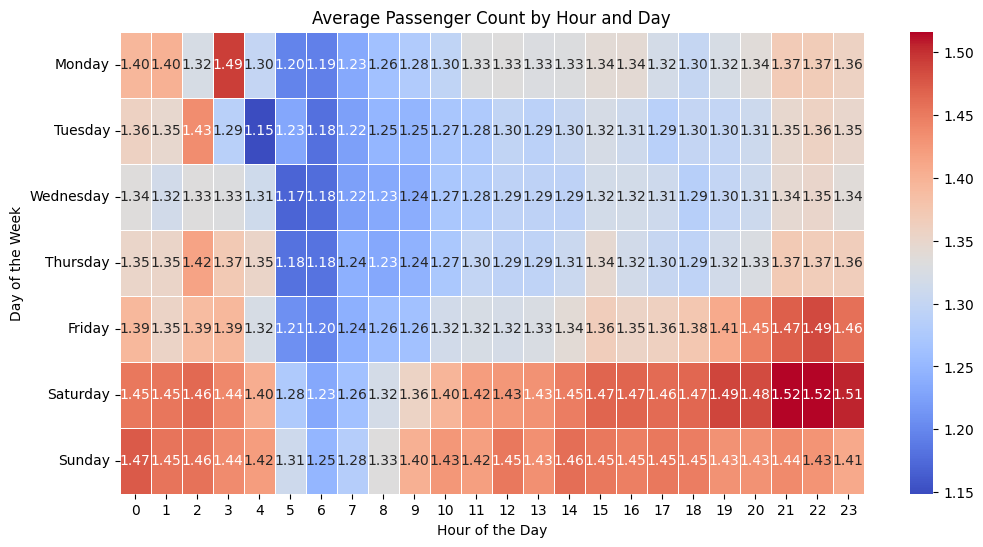

In [119]:
# Convert pickup time to datetime format
merged_df["tpep_pickup_datetime"] = pd.to_datetime(merged_df["tpep_pickup_datetime"])

# Extract day of the week (0 = Monday, 6 = Sunday) and hour of the day (0-23)
merged_df["day_of_week"] = merged_df["tpep_pickup_datetime"].dt.dayofweek
merged_df["hour_of_day"] = merged_df["tpep_pickup_datetime"].dt.hour

# Group by day and hour to compute the average passenger count
passenger_trend = merged_df.groupby(["day_of_week", "hour_of_day"])["passenger_count"].mean().reset_index()

# Pivot the data for heatmap visualization
passenger_pivot = passenger_trend.pivot(index="day_of_week", columns="hour_of_day", values="passenger_count")

# Set day labels for better readability
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_pivot.index = day_labels

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Average Passenger Count by Hour and Day")


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



Zones by Total Passenger Count:
      PULocationID  total_passengers  avg_passengers_per_trip  trip_count
197           237          135907.0                 1.325650      102521
135           161          126468.0                 1.346163       93947
196           236          123931.0                 1.334011       92901
118           142           96941.0                 1.368411       70842
136           162           96714.0                 1.306116       74047
..            ...               ...                      ...         ...
200           240               1.0                 1.000000           1
95            115               1.0                 1.000000           1
47             57               1.0                 1.000000           1
134           160               1.0                 1.000000           1
170           206               1.0                 1.000000           1

[222 rows x 4 columns]


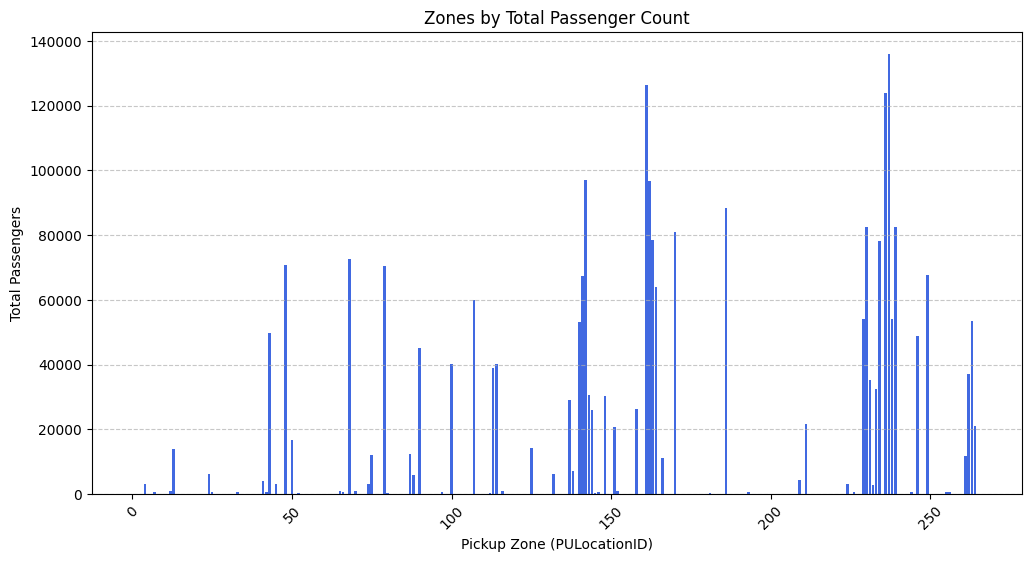

In [120]:
# Remove invalid passenger counts (NaN or zero)
valid_trips = merged_df[merged_df["passenger_count"] > 0]

# Group by pickup zone (PULocationID) and compute total & average passengers per zone
passenger_analysis = valid_trips.groupby("PULocationID").agg(
    total_passengers=("passenger_count", "sum"),
    avg_passengers_per_trip=("passenger_count", "mean"),
    trip_count=("passenger_count", "count")
).reset_index()

# Sort by total passengers
passenger_analysis = passenger_analysis.sort_values(by="total_passengers", ascending=False)

# Display the  zones with the highest passenger count
print("Zones by Total Passenger Count:\n", passenger_analysis)

# Plot top 10 zones with highest passenger counts
plt.figure(figsize=(12, 6))
plt.bar(passenger_analysis["PULocationID"], passenger_analysis["total_passengers"], color="royalblue")

# Add labels and title
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Total Passengers")
plt.title("Zones by Total Passenger Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



In [121]:
# Remove invalid passenger counts (NaN or zero)
valid_trips = merged_df[merged_df["passenger_count"] > 0]

# Compute the average passenger count per zone (PULocationID)
avg_passenger_per_zone = valid_trips.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge the computed average passenger count back into the original dataset
trips_df = merged_df.merge(avg_passenger_per_zone, on="PULocationID", how="left")

# Display the updated dataset with the new column
print(trips_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.24         1.0                  N           161           237   
1           1.59         1.0                  N            79           164   
2           3.16         1.0                  N            79           256   
3           0.90         1.0                  N           148           114   
4           2.78         1.0                  N            79           186   

   payment_type  ...    borough  \
0             1  ...  Manhattan   
1   

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Pickup Zones with Extra Charges:
 PULocationID
161    61080
237    58395
236    48275
162    46271
142    44173
       ...  
160        1
19         1
173        1
77         1
191        1
Name: count, Length: 183, dtype: int64

Dropoff Zones with Extra Charges:
 DOLocationID
236    56846
237    50289
239    37621
170    37431
141    37130
       ...  
253        1
123        1
23         1
59         1
16         1
Name: count, Length: 211, dtype: int64


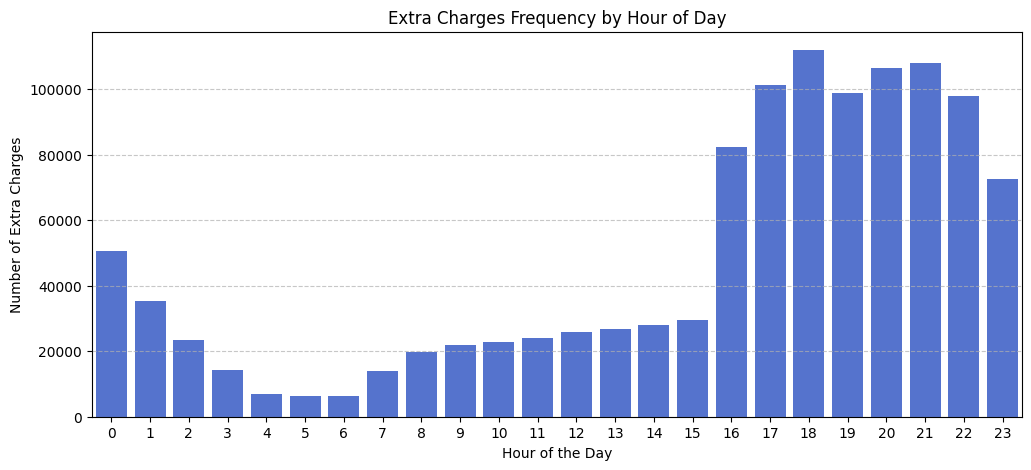

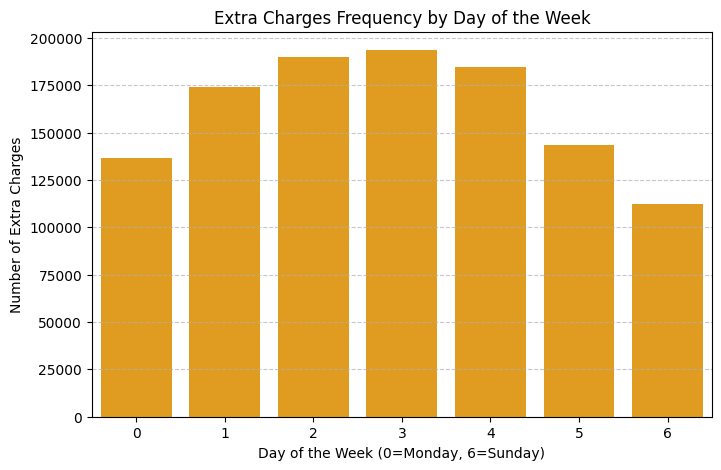

In [122]:
# How often is each surcharge applied?

# Filter trips where an extra charge was applied
extra_charges_df = merged_df[merged_df["extra"] > 0]

# Count occurrences of extra charges per pickup and drop-off zones
extra_pickup_zones = extra_charges_df["PULocationID"].value_counts()
extra_dropoff_zones = extra_charges_df["DOLocationID"].value_counts()

# Convert pickup time to datetime and extract hour and day
trips_df["tpep_pickup_datetime"] = pd.to_datetime(trips_df["tpep_pickup_datetime"])
trips_df["hour_of_day"] = trips_df["tpep_pickup_datetime"].dt.hour
trips_df["day_of_week"] = trips_df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6

# Analyze extra charges by time of day
extra_time_trends = extra_charges_df.groupby("hour_of_day")["extra"].count()

# Analyze extra charges by day of the week
extra_day_trends = extra_charges_df.groupby("day_of_week")["extra"].count()

# Display the top pickup/dropoff zones where extra charges occur
print("Pickup Zones with Extra Charges:\n", extra_pickup_zones)
print("\nDropoff Zones with Extra Charges:\n", extra_dropoff_zones)

# Plot extra charge frequency by hour of day
plt.figure(figsize=(12, 5))
sns.barplot(x=extra_time_trends.index, y=extra_time_trends.values, color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Extra Charges")
plt.title("Extra Charges Frequency by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot extra charge frequency by day of week
plt.figure(figsize=(8, 5))
sns.barplot(x=extra_day_trends.index, y=extra_day_trends.values, color="orange")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Extra Charges")
plt.title("Extra Charges Frequency by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

There are following below points to recommend for optimizing routing and dispatching based on demand and patterns and operation inefficiencies after analysis of NYC taxi trip data.

1. Time-of-Day and Day-of-Week Optimization:
    - We can increase the taxi availability in high demand zones (For PULocationID 2013) during peak hours.
    - We should deploy more vehicles during peak hours (e.g., evenings, Fridays/Saturdays) and in high-demand zones (For PULocationID=2013).
    - We should consider dynamic pricing adjustments during peak hours to balance supply and demand.
    - During low-demand periods, re-route or temporarily remove vehicles from less demanding areas.
    - We can use alternative routes for slower/congested zones.

2. Vendor Performance Analysis:
    - Vendors need to adust the pricing for long and low fare routes.
    - Vendors should use different pricing strategies to reduce the price for short distance as for short distance fare amount are higher as compare to longer and medium distance.
    - Consider strategic partnerships with high-performing vendors or encourage other vendors to adopt best practices.

3. Passenger Count and Zone Analysis:
    - We can use larger capacity vehicles in zones with high multi-passeger trips (where passenger count > 4).
    - We should optimize vehicle capacity allocation based on average passengers per zone.  For instance, during peak demand in zones with high passenger counts, dispatch larger vehicles (e.g., vans).
    - We need to pre-position vehicles in high-demand zones or near events anticipating high passenger traffic.

4. Surcharge Analysis:
    - We can implement surge pricing during peak congestion time and instruct drivers to consider potential surcharges when planning routes and factor them into estimated fares in evenings and nights.
    - We should provide incentives to drivers to serve areas with high surcharge frequencies.

5. Real-time Adjustments:
   - We can implement the discount/promotions in low-demand areas to boost the rides.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

There are following below points to consider for positioning cabs across different zones to make best use of insights uncovered by analyzing trip trends across time, days and months.

1. Peak Demand Zones and Times:
    - There are high demand in taxi during week days Monday, Tuesday and Thurday and in afternoon peak hours.
    - We should pre-position a larger number of cabs in these high-demand zones before peak times to minimize wait times and ensure availability. This proactive positioning is crucial to meet the surge in demand.

2. Anticipate Demand Fluctuations:
    - There are high demand in taxi during week days Monday, Tuesday and Thurday and in afternoon peak hours. There might be some events organized on these days.
    - We should adjust cab deployment in anticipation of these events. Increase the supply of cabs in affected zones well before the event starts and maintain higher numbers throughout the event's duration.

3. Dynamic Rebalancing:
    - There are high demand zone like location id 2013. In this zone we should increase the number of cabs to handle the passegner and enhace the .
    - Implement a system that dynamically rebalances the cab fleet. If a new
      hotspot emerges, redirect cabs from lower-demand areas to the new hotspot.
    - Use real-time data to predict and address sudden surges in demand.

4. Optimize Cab Distribution During Off-Peak Hours:
    - In identified low demand during off-peak hours. We should repositon the cabs from low demand area to high demand zones.
    - Strategically reposition cabs from these areas to zones where demand is
      predicted to increase soon.
    - This approach ensures that cabs are efficiently deployed and ready to meet
      future demand.

5. Collaboration with Vendors:
    -  We should prioritize vendors for peak zones, especially those demonstrating competitive pricing and high customer satisfaction during peak hours.

7. Leverage Data-Driven Pricing:
    - We should apply the surchrgae on week days to dynamically adjust prices in high-demand zones and during peak times. We should implement surge pricing, but do it strategically.
    - We should monitor the effectiveness of pricing strategies by observing the impact on supply and demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

There are following points to consider after analysis of pricing strategies to maximize revenue while maintaining competitiveness.

1. Fare per Mile Analysis:
- The tiered fare analysis reveals how average fare per mile varies across different distance categories (short, medium, long) and vendors.  
- Key Insight: If a vendor's fare per mile is significantly higher than competitors for a specific distance tier, consider lowering it to attract more riders. Conversely, if fares are lower, assess whether increases are feasible while remaining competitive. Pay close attention to short-distance trips, where higher fares per mile might deter customers.

2. Tip Percentage Analysis:
- Analyzing tip percentages based on trip distance, passenger count, and time of day helps uncover customer behavior and preferences.
- Key Insight: Lower tip percentages for certain factors (e.g., long trips, fewer passengers, late nights) suggest opportunities to enhance customer experience. Higher tip percentages identify potential upselling opportunities or customer segments who value certain trip characteristics.

3. Passenger Count Analysis:
- We should examin passenger counts across hours and days of the week informs us about peak demand.
- Key Insight: High passenger count during peak hours suggests a pricing opportunity. Consider dynamic pricing (surge pricing) during peak hours and high-demand locations to balance supply and demand and increase revenue.  Consider discounts during low-demand periods to incentivize riders.

4. Surcharge Analysis:
- After Analyzing pickup/dropoff zones and times when extra charges are applied frequently allows us to target specific situations.
- Key Insight: We should let extra charges are applied more frequently at specific times and places. Implement surge pricing that aligns with these times to capture increased demand and boost revenue in these high-surcharge areas.  Focus on optimizing routing and dispatch to minimize surcharge occasions where possible (e.g., by providing alternative routes or by deploying additional drivers to congested areas).

5. Data-Driven Pricing Adjustments:
- Short Distances: Reduce fares per mile if above market rate to enhance competitiveness and capture a larger share of short trips.
- Medium/Long Distances:  Analyze the price differential between vendors and cautiously increase rates if below market, ensuring not to deter passengers to competitors.
- Peak Hours/High-Demand Zones: Implement a dynamic, time-based pricing strategy (surge pricing) during peak periods.
- Off-Peak Hours/Low-Demand Zones: Consider discounts or promotions in low demand zones to stimulate ridership without heavily impacting revenue per trip.
- Surcharge Alignment:  Align pricing and surcharge implementation more effectively with known periods of peak extra charges and congestion.
- Revenues in daytime is comparatively higher around (88.5%) as as compare to night. We should focus more on optimizing routing in daytime.